# Apply Emotion Tracker
Nov 14th 2019

Testing that the emotion tracker works for utterances in corpus.

In [2]:
# import required modules and set up environment
import os

# replace file path below with your own local convokit
os.chdir('/Users/marianneaubin/Documents/Classes/CS6742/cs6742-fork')

import convokit

from convokit import Corpus, Parser, EmoTracker, Transformer
import nltk

In [16]:
# load corpus

corpus_instance = "news"
# politics, democrats, liberal, news


path = "../datasets/" + corpus_instance + "-filtered-labelled-small"
corpus = convokit.Corpus(filename=path)

In [17]:
corpus.print_summary_stats()

Number of Users: 224557
Number of Utterances: 1298310
Number of Conversations: 25695


In [18]:
et = EmoTracker();
corpus = et.transform(corpus)

processed  10000 utterances 
processed  20000 utterances 
processed  30000 utterances 
processed  40000 utterances 
processed  50000 utterances 
processed  60000 utterances 
processed  70000 utterances 
processed  80000 utterances 
processed  90000 utterances 
processed  100000 utterances 
processed  110000 utterances 
processed  120000 utterances 
processed  130000 utterances 
processed  140000 utterances 
processed  150000 utterances 
processed  160000 utterances 
processed  170000 utterances 
processed  180000 utterances 
processed  190000 utterances 
processed  200000 utterances 
processed  210000 utterances 
processed  220000 utterances 
processed  230000 utterances 
processed  240000 utterances 
processed  250000 utterances 
processed  260000 utterances 
processed  270000 utterances 
processed  280000 utterances 
processed  290000 utterances 
processed  300000 utterances 
processed  310000 utterances 
processed  320000 utterances 
processed  330000 utterances 
processed  340000 u

In [19]:
categories = ["sadness", "violence", "rage", "pain", "anger", "love", "politics"]
sadness_words = ["sadness", "pain", "love"]
anger_words = ["rage", "violence", "anger"]

In [20]:
def get_cat_colour(cat):
    if cat in sadness_words:
        return "teal"
    elif cat in anger_words:
        return "black"
    elif cat == "politics":
        return "grey"

{'sadness': 48078, 'violence': 167262, 'rage': 19375, 'pain': 107764, 'anger': 23121, 'love': 58081, 'politics': 65635}


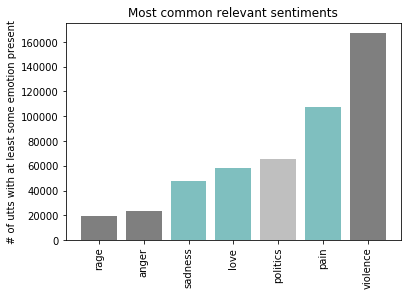

In [21]:
import matplotlib.pyplot as plt
import numpy as np

counter = 1
corpus_emo_dist_dict = {"sadness": 0, 
                       "violence":0,
                       "rage":0,
                       "pain":0,
                       "anger":0,
                       "love":0,
                       "politics":0}
for conv_id in corpus.conversations:
    conv = corpus.get_conversation(conv_id)
    for utt in conv.iter_utterances():
        if utt.meta["analysis"] != None:
            for cat in categories:
                if utt.meta["analysis"][cat] != 0.0:
                    corpus_emo_dist_dict[cat] = corpus_emo_dist_dict[cat] + 1
            counter = counter + 1
print(corpus_emo_dist_dict)

Y = []
for cat in categories:
    Y.append(corpus_emo_dist_dict[cat])
    
X = categories

idx   = np.argsort(Y)

X = np.array(X)[idx]
Y = np.array(Y)[idx]

colours = []
for cat in X:
    colours.append(get_cat_colour(cat))

plt.bar(X, Y, align='center', alpha=0.5, color=colours)
plt.xticks(X, rotation='vertical')
plt.ylabel('# of utts with at least some emotion present')
plt.title('Most common relevant sentiments')

plt.show()

In [27]:
counter = 1
for conv_id in corpus.conversations:
    conv = corpus.get_conversation(conv_id)
    for utt in conv.iter_utterances():
        if utt.meta['analysis']['politics'] != 0 and utt.meta['event'] == 'Aurora theater shooting':
            print("starting new utterance:")
            print(utt.text)
            print(utt.meta['event'])
            print('==================')
        counter += 1
        if counter % 10000:
            break


starting new utterance:
**AURORA MASSACRE: THE COMPREHENSIVE TIMELINE**

*All information here has been independently gathered and aggregated. Accuracy, clarity, and transparency have been the main goals - but any postings (unless official police or hospital releases) should be taken at your own discretion*

|Hospital|Victims|Critical|Released|
|:--------|--------|--------|---------:|
|Childrens|6|1|3|
|Swedish|4|0|2|
|University|23|5|13|
|Aurora|18|2|13|
|Denver|7|0|5|
|Parker|2|0|2|
|[source](http://imgur.com/a/Jvqf6)|60|8|38|

**Confirmed victims:** [Veronica Moser](http://bit.ly/Qbwi92) (6), [AJ Boik](http://on.fb.me/NSZHTu) (18), [Micayla Medek](http://lat.ms/Odwbmi) (23), [Jessica Ghawi](http://cbsn.ws/NGz95x) (24), [Alexander Teves](http://bit.ly/MWNVlt) (24), [Jonathan Blunk](http://nbcnews.to/NEwkSq) (26), CT3, USN [John Larimer](http://bit.ly/NT1aJn) (27), [Alex Sullivan](http://bit.ly/LBatYZ) (27), [Matthew McQuinn](http://bit.ly/My0U18) (27), US Air Force Staff Sgt. [Jesse 

## Analysis
Now we try to establish a time series of how many words there are per day after December 14, 2012 (Sandy Hook shooting day). Timestamp: 1355461200

In [28]:
events = [['Fort Hood', '2009-11-05', '2009-11-13', 'forthood'],
          ['Aurora Theater', '2012-07-20', '2012-07-28', 'auroratheater'], 
          ['Sandy Hook', '2012-12-14', '2012-12-22', 'sandyhook'],
          ['Washington Navy Yard', '2013-09-16' , '2013-09-24', 'wanavyyard'],
          ['San Bernardino', '2015-12-02' , '2015-12-10', 'sanbernandino'],
          ['Orlando Nightclub', '2016-06-12' , '2016-06-20', 'orlandonightclub'],
          ['Las Vegas', '2017-10-01' , '2017-10-09', 'lasvegas'],
          ['Sutherland Springs Church', '2017-11-05' , '2017-11-13', 'sutherland'], 
          ['Stoneman Douglas High', '2018-02-14' , '2018-02-22', 'parkland'],
          ['Santa Fe High', '2018-05-18' , '2018-05-26', 'santafehigh'],
          ['Pittsburgh Synagogue', '2018-10-27' , '2018-11-04', 'pittsburgh']]

#convert to dict

In [33]:
all_posts = [] 
for i in range(len(events)):
    all_posts.append(plotPostCount(events[i][3],events[i][1],events[i][2]))
    
print(all_posts)

events_list = list(zip(*events))[0]

print(events_list)

FileNotFoundError: [Errno 2] No such file or directory: '../forthood_utterance_ids.csv'

In [32]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

#create df for facet plot

post_df = pd.DataFrame()
df_events_list = np.repeat(events_list, 7)
all_post = []

for posts in all_posts:
    all_post+=posts


post_df["event"] = df_events_list
post_df["days"] = list(range(1, 8))*11
post_df["posts"] = all_post

post_df

NameError: name 'events_list' is not defined

In [31]:
plt.plot(bin_times,num_posts_sh)
plt.xticks(rotation='vertical')
plt.ylabel('Number of posts')
plt.title('Number of posts per day 7 days after Sandy Hook')
plt.show()

NameError: name 'bin_times' is not defined